In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib

In [3]:
data = pd.read_csv('G:/dataanalytics/liver_patient/data/liver_patient.csv')

In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
print(data.groupby('Gender').size())

Gender
Female    142
Male      441
dtype: int64


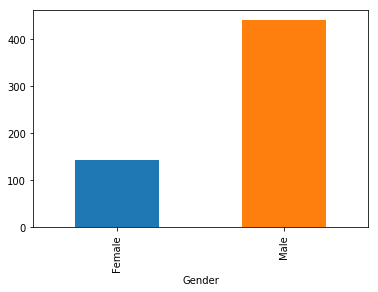

In [8]:
data.groupby('Gender').size().plot.bar()

In [9]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Male' else 0)

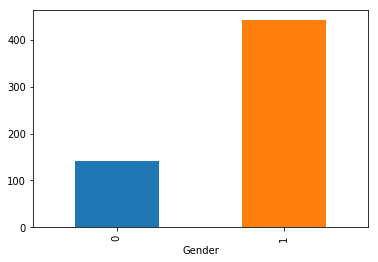

In [10]:
data.groupby('Gender').size().plot.bar()

In [11]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [12]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [13]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

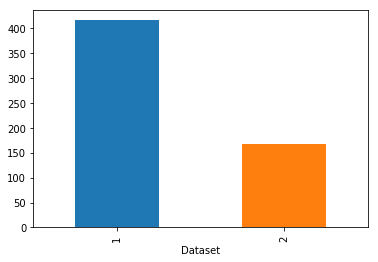

In [14]:
data.groupby('Dataset').size().plot.bar()

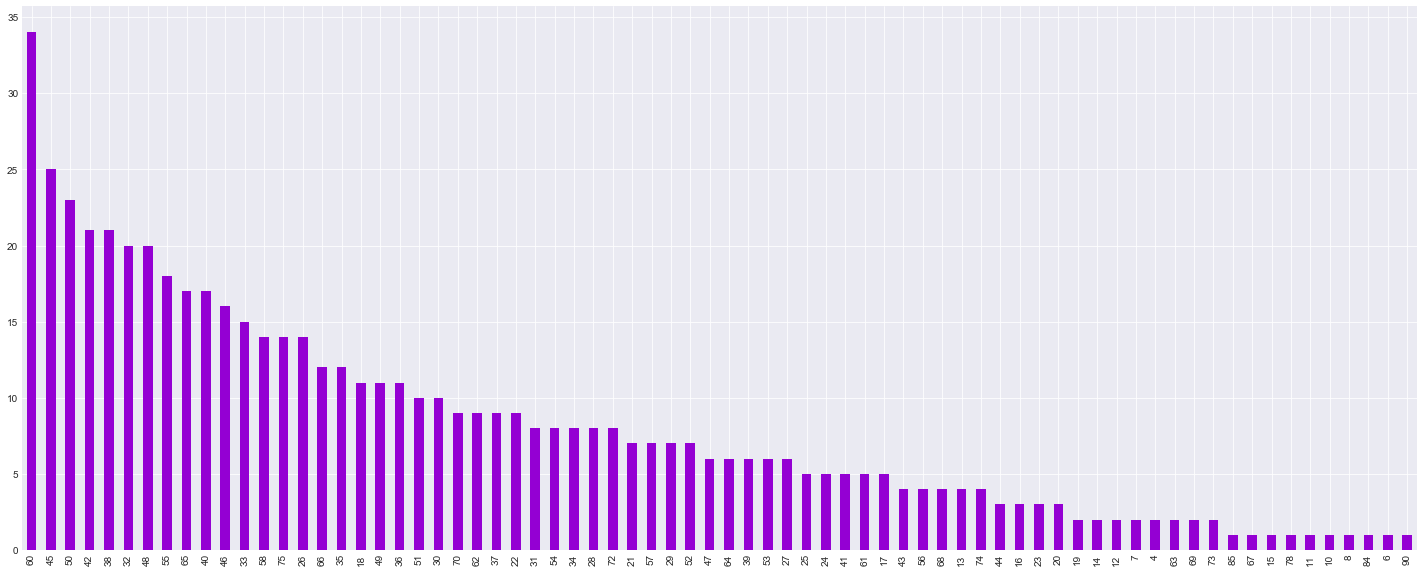

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
data['Age'].value_counts().plot.bar(color='darkviolet')

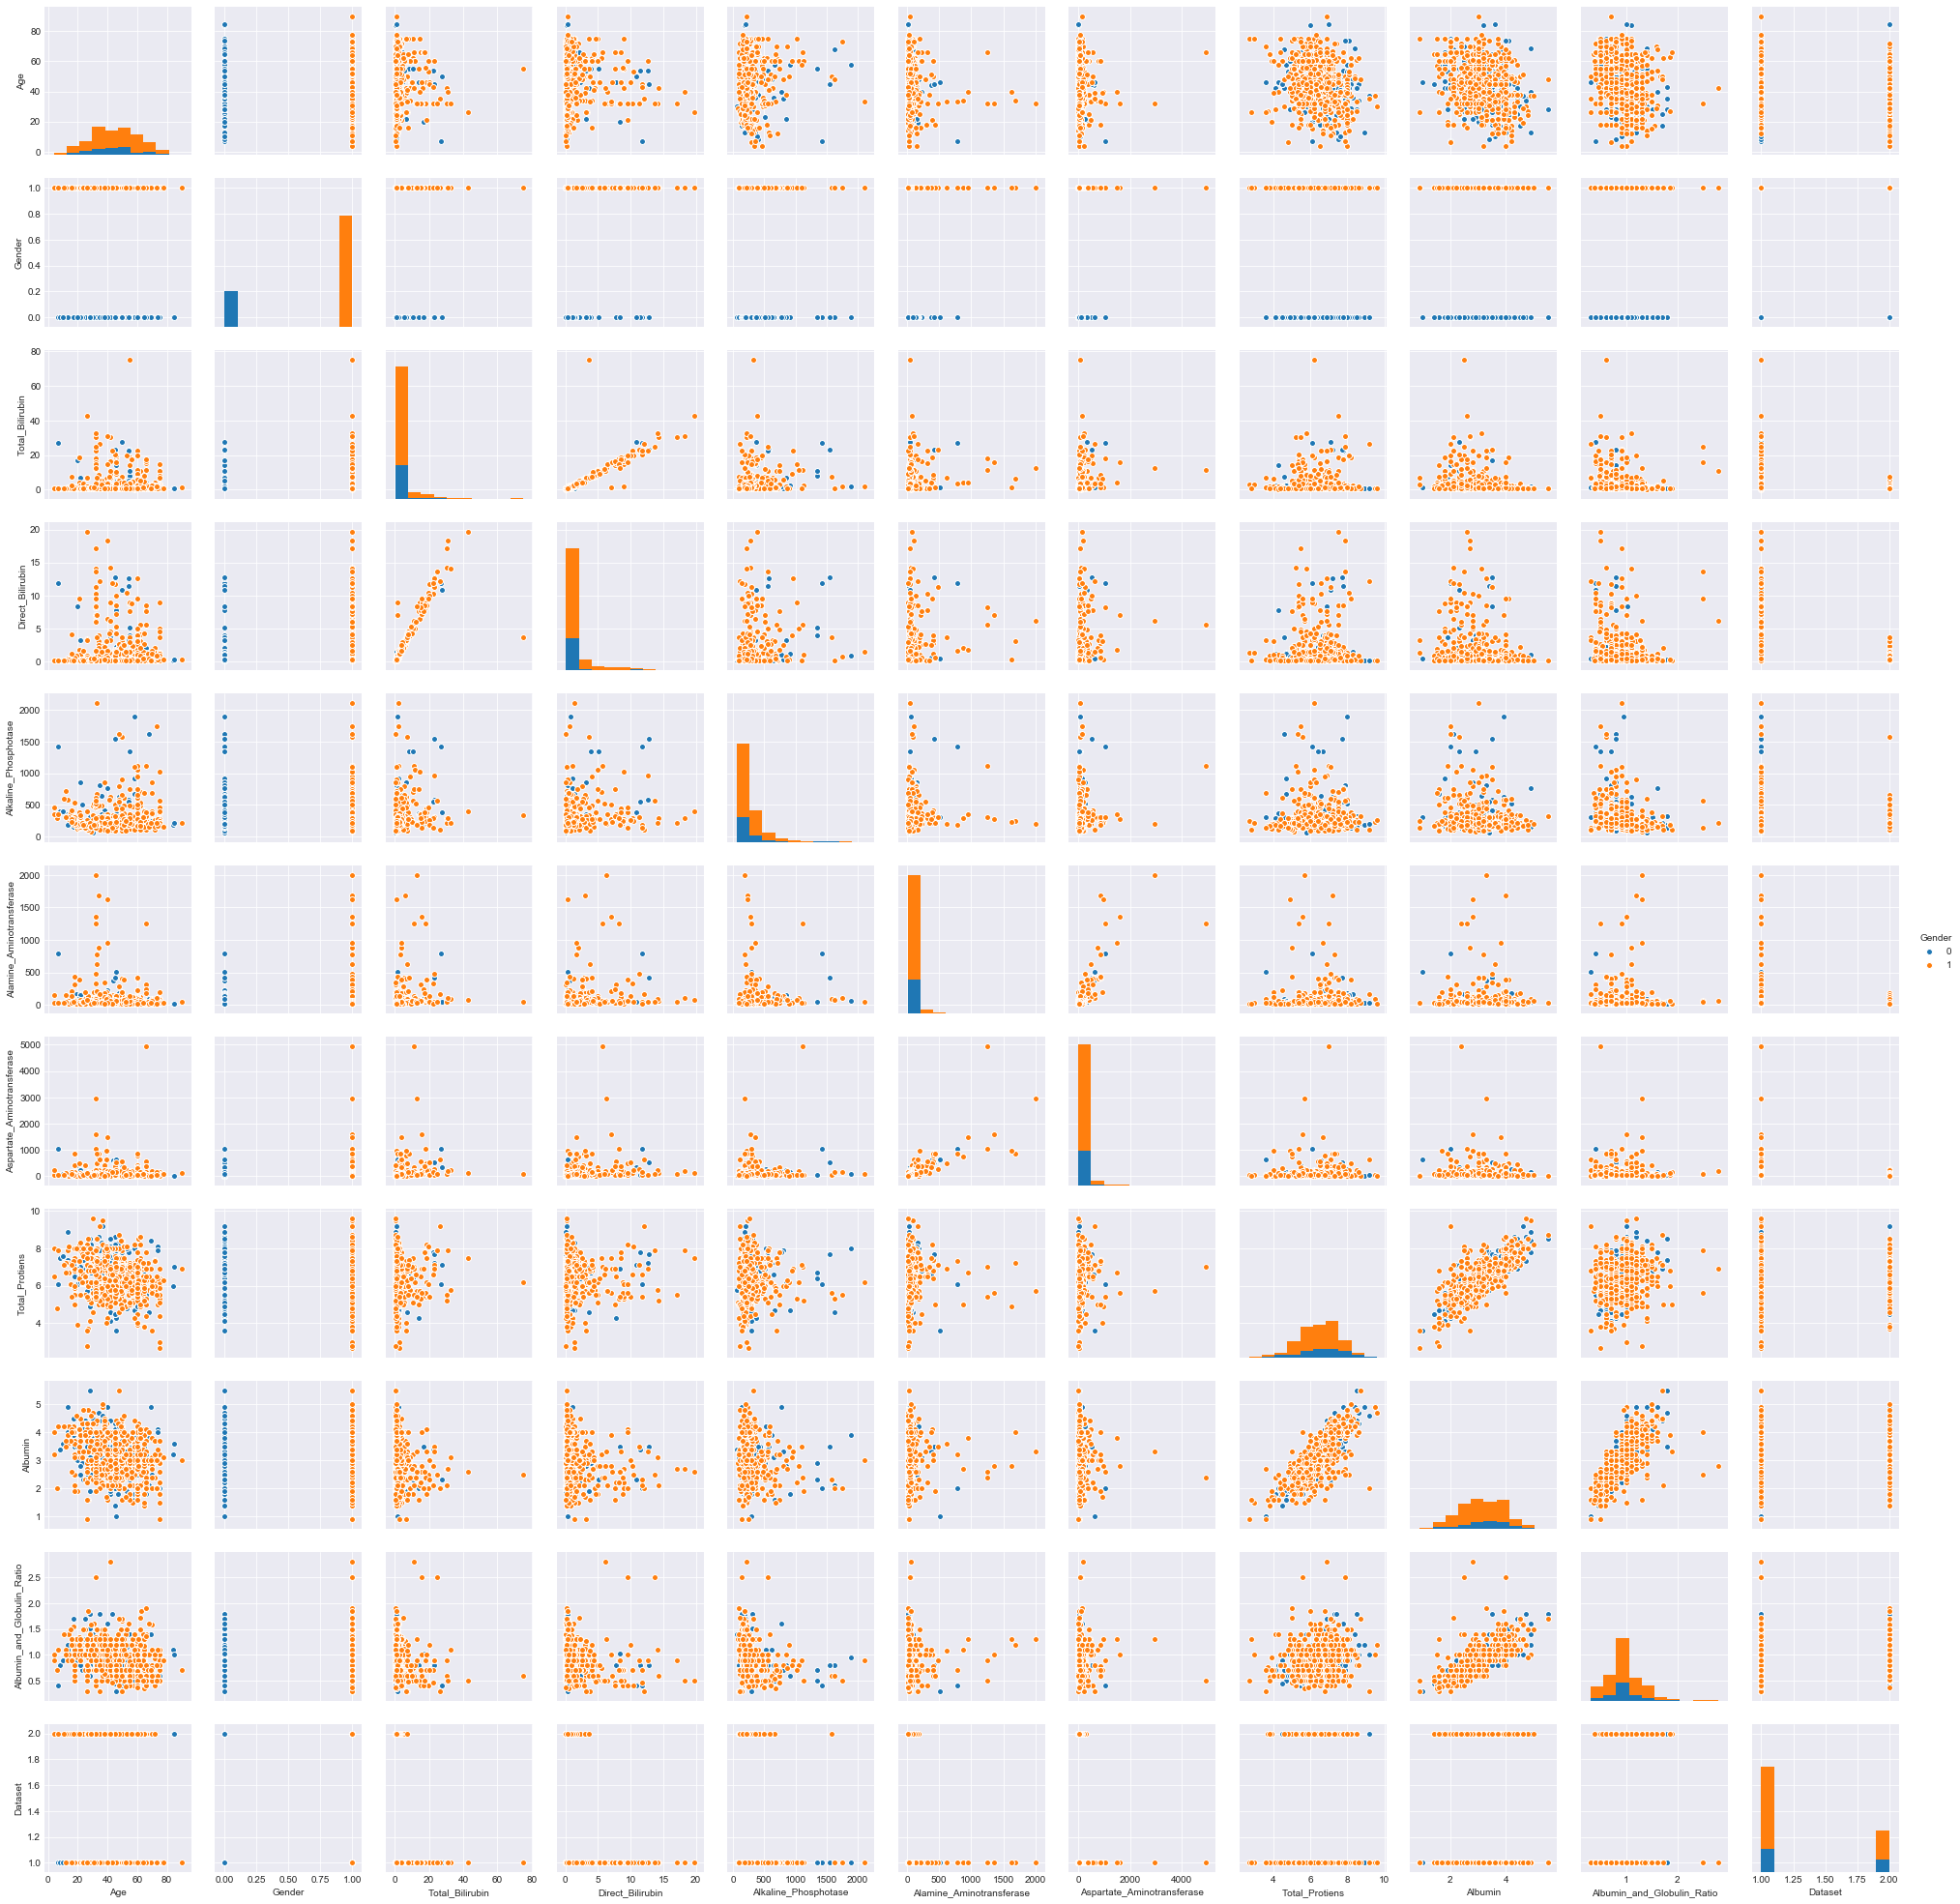

In [16]:
sns.pairplot(data,hue='Gender')

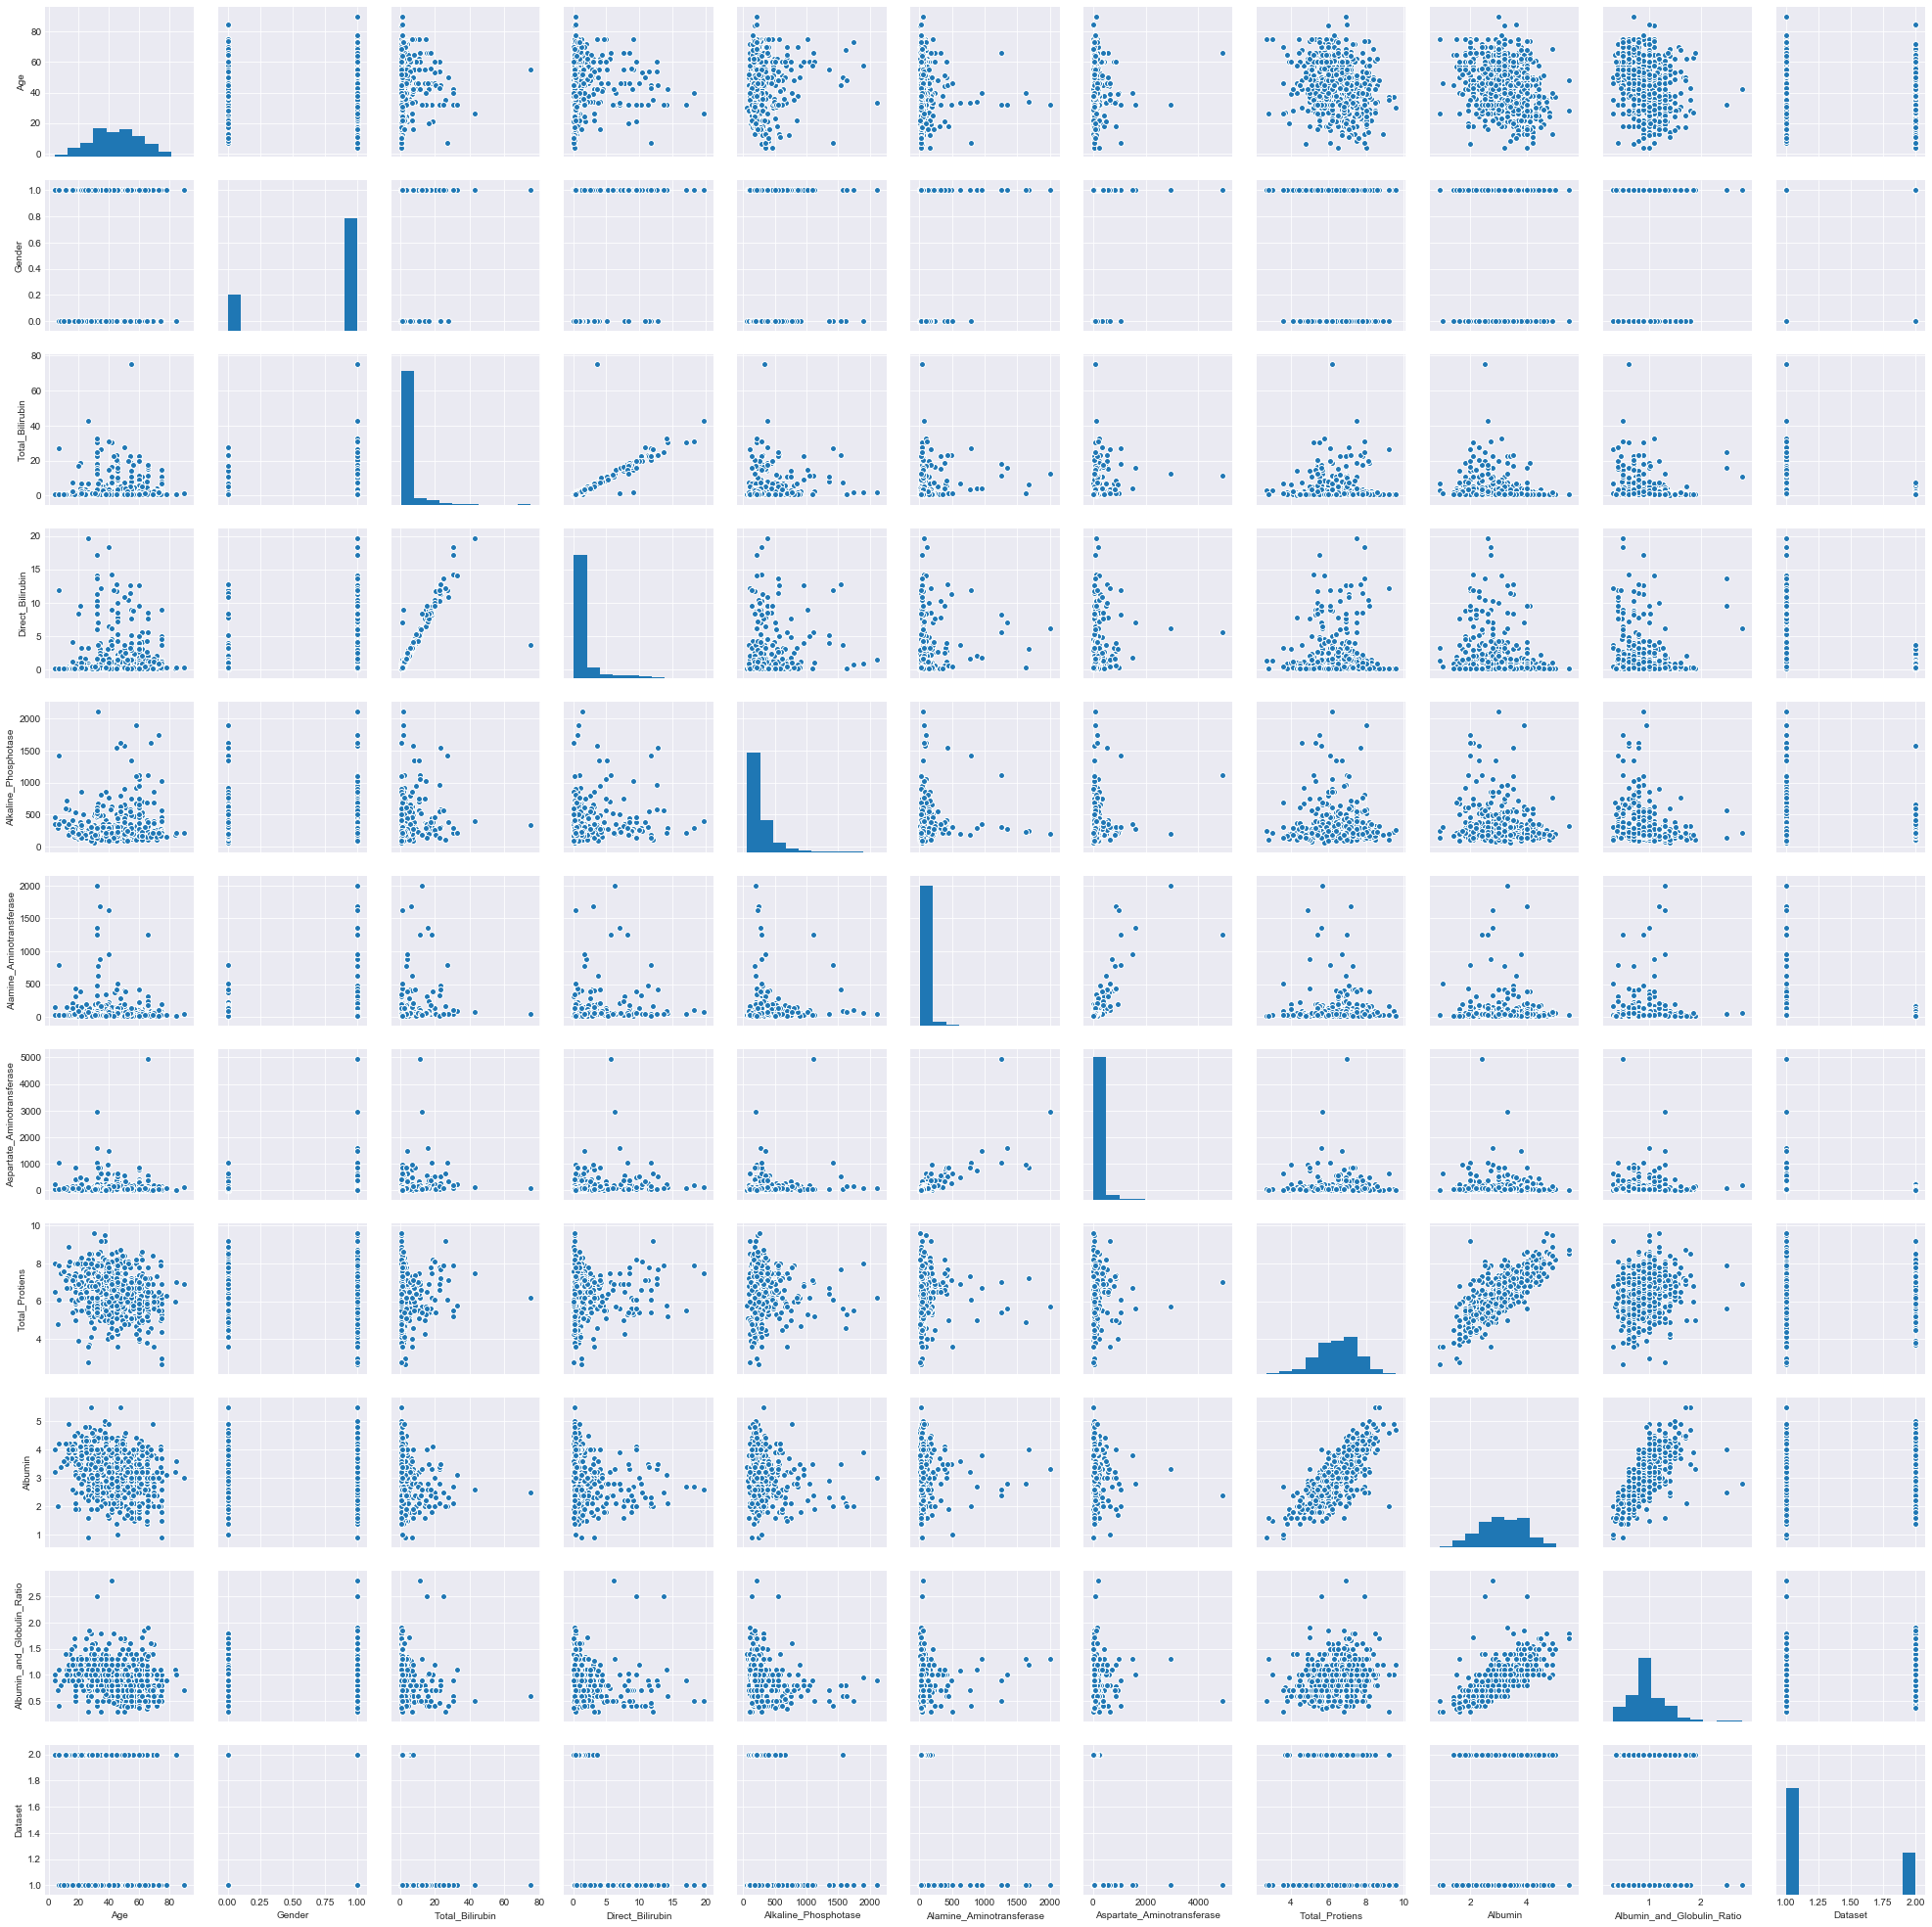

In [17]:
sns.pairplot(data)

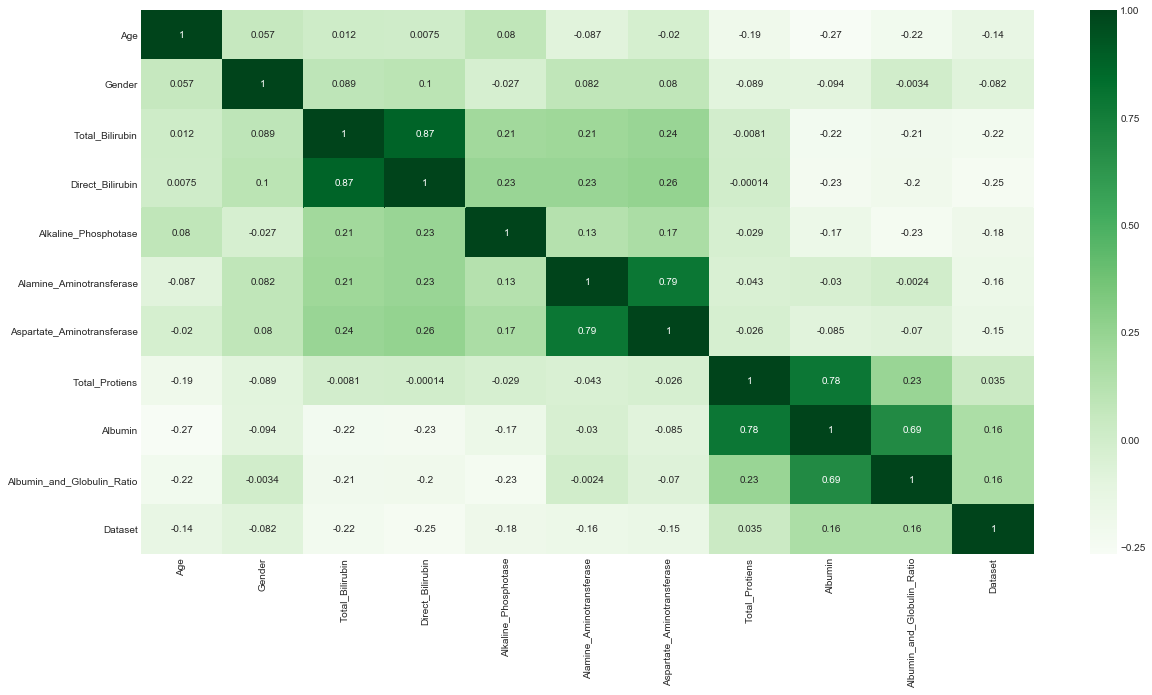

In [18]:
corr=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap="Greens",annot=True)

In [19]:
x = data.iloc[:,0:10]
y = data.iloc[:,10]
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [20]:
logit = LogisticRegression(C=1, penalty='l1')
logit.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print("accuracy :" , logit.score(x_test, y_test))

accuracy : 0.6923076923076923


In [22]:
joblib.dump(logit, 'G:/dataanalytics/liver_patient/data/logit_model.pkl') 

['G:/dataanalytics/liver_patient/data/logit_model.pkl']

In [23]:
knn = KNeighborsClassifier(n_neighbors = 10, p=2, metric = 'euclidean') 
knn.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [24]:
print("accuracy :" , knn.score(x_test, y_test))

accuracy : 0.7264957264957265


In [25]:
joblib.dump(logit, 'G:/dataanalytics/liver_patient/data/knn_model.pkl') 

['G:/dataanalytics/liver_patient/data/knn_model.pkl']

In [26]:
clf = GradientBoostingClassifier(n_estimators=500)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7350427350427351


In [27]:
joblib.dump(logit, 'G:/dataanalytics/liver_patient/data/gboost_model.pkl') 

['G:/dataanalytics/liver_patient/data/gboost_model.pkl']